In [1]:
import pickle
import pandas as pd  
import numpy as np
import re
from sklearn.preprocessing import StandardScaler

In [2]:
path_data = "../data/NOMAL.xlsx"

In [3]:
raw_df = pd.read_excel(path_data)

In [4]:
# /!\ Problematic for testing /!\
# Remove features with constant values
noInfo_columns = raw_df.columns[raw_df.nunique() <= 1] # columns with no values or with only the same value

filtered_df = raw_df.loc[:, raw_df.nunique() > 1] # this operation also removes the empty columns

In [5]:

# Function to remove special characters from a string
def remove_special_characters(string):
    return re.sub(r'\W+', '', string)

# Rename the features in filtered_df
filtered_df.rename(columns=lambda x: remove_special_characters(x), inplace=True)

c:\Users\balth\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [6]:
# Defining the categories for data

patient_general = ["Codice identificativo:", 'Sesso', 'Nazionalità', 'Età', 'Domicilio','Altezza','Peso', 'Sub-Saharan Africa', 'Pregressa malaria', 'Profilassi']
comorbidities = ['Comorbilità', 'Diabete', 'HIV', 'Cirrosi', 'IRC']
patient_state_arrival = ['GCS', 'Seizures', 'Prostrazione', 'Shock', 'Bleeding', 'ARDS', 'Anemia', 'Creatinina', 'Glicemia', 'Acidosi', 'Bilirubina', 'Hyperparasitaemia', 'Numero criteri']
diagnosis_type = ['RDT', 'Emoscopia', 'NAAT']
diagnosis_result = ['Falciparum', 'Ovale', 'Parassitemia valore assoluto', 'Percentuale parassitemia']
baseline_other = ['PA sistolica', 'PA diastolica', 'FC', 'FR', 'Temperatura', 'Ritardo terapeutico']
QTc = ['QTc ingresso', 'QTc dopo ACT', 'QTC dopo ultima somministrazione artesunato *']
T0 =  ["T0. [GB (in cell/ul):]", "T0. [GR (in cell/ul):]", "T0. [Hb (in g/dl):]", "T0. [PLT (in cell/ul):]", "T0. [Glicemia (in mg/dl):]", "T0. [Azotemia (in mg/dl):]", "T0. [Creatinina (in mg/dl):]", "T0. [LDH (in U/L):]", "T0. [AST (in U/L):]", "T0. [ALT (in U/L):]", "T0. [Bilirubina tot (in mg/dl):]", "T0. [Bilirubina diretta (in mg/dl):]", "T0. [Sodio (in mEq/l):]", "T0. [Potassio (in mEq/l):]", "T0. [Ca (in mg/dl):]", "T0. [INR:]", "T0. [fibrinogeno (in mg/dl):]", "T0. [pH:]", "T0. [bicarbonati (in mmol/l):]", "T0. [Lattati # (in mmol/l):"]
T1 = ["T1. [Goccia spessa e striscio periferico:]", "T1. [TC (temperatura corporea) in °C:]"]
T2 = ["T2. [Goccia spessa e striscio periferico:]", "T2. [TC (temperatura corporea) in °C:]"]
T3 = ["T3. [Goccia spessa e striscio periferico:]", "T3. [TC (temperatura corporea) in °C:]"]
T7 = [ "T7. [Goccia spessa e striscio periferico:]","T7. [TC (temperatura corporea) in °C:]"]
treatment = ["Artesunato ev: Somministrazione [1][Data inizio e ora]", "Artemether/ Lumefantrina: Somministrazione [1][Data inizio e ora]", "Diidroartemisinina/Piperachina: Somministrazione [1][Data inizio e ora]", "ACT", "Artesunato + ACT", "Atovaquone/Proguanile", "Doxiciclina per os", "Clindamicina", "Antibiotici", "Chinino", "Primachina", "Durata Artesunato"]
outcome = ["Durata ricovero", "Decesso.", "ICU", "Eventuali sequele:", "PADH, post-artesunate delayed haemoly1s", "Insorgenza PADH", "Permanenza in Terapia Intensiva (giorni):", "Trasferimento in Rianimazione (anche in altro centro)?", "Guarigione"]
PADH_info = ["Insorgenza PADH", "Si prega di fornire tutti i parameri vitali. [GB (in cell/ul):]", "Si prega di fornire tutti i parameri vitali. [Hb (in g/dl):]", "Si prega di fornire tutti i parameri vitali. [PLT (in cell/ul):]", "Si prega di fornire tutti i parameri vitali. [reticoliti (in cell/ul):]", "Si prega di fornire tutti i parameri vitali. [LDH (in U/l)lcio:]", "Si prega di fornire tutti i parameri vitali. [AST (U/L):]", "Si prega di fornire tutti i parameri vitali. [ALT (U/L):]", "Si prega di fornire tutti i parameri vitali. [Bilirubina tot (mg/dl):]", "Si prega di fornire tutti i parameri vitali. [Bilirubina diretta (mg/dl):]", "Si prega di fornire tutti i parameri vitali. [aptoglobina (in mg/dl):]", "Si prega di fornire tutti i parameri vitali. [test di Coombs diretto:]", "Si prega di fornire tutti i parameri vitali. [test di coombs indiretto:]", "Vuole riportare ulteriori informazioni relative ai prelievi effettuati durante le visite intermedie fino alla risoluzione dell’emolisi?", "Nadir Hb", "Trasfusione:", "Unità trasfuse"]
follow_up = ["Altri eventi avversi", "Diarrea e disidratazione", "Ipertransaminasemia tardiva", "Polmonite", "IVU nosocomiale", "Esofagite", "Dispepsia", "Tachiaritmia sopraventricolare"]

In [7]:
# Removing special caracters from the category description


# Function to remove special characters from a string
def remove_special_characters(string):
    return re.sub(r'\W+', '', string)

# Update the list of features for each category
patient_general = [remove_special_characters(feature) for feature in patient_general]
comorbidities = [remove_special_characters(feature) for feature in comorbidities]
patient_state_arrival = [remove_special_characters(feature) for feature in patient_state_arrival]
diagnosis_type = [remove_special_characters(feature) for feature in diagnosis_type]
diagnosis_result = [remove_special_characters(feature) for feature in diagnosis_result]
baseline_other = [remove_special_characters(feature) for feature in baseline_other]
QTc = [remove_special_characters(feature) for feature in QTc]
T0 = [remove_special_characters(feature) for feature in T0]
T1 = [remove_special_characters(feature) for feature in T1]
T2 = [remove_special_characters(feature) for feature in T2]
T3 = [remove_special_characters(feature) for feature in T3]
T7 = [remove_special_characters(feature) for feature in T7]
treatment = [remove_special_characters(feature) for feature in treatment]
outcome = [remove_special_characters(feature) for feature in outcome]
PADH_info = [remove_special_characters(feature) for feature in PADH_info]
follow_up = [remove_special_characters(feature) for feature in follow_up]

In [8]:
# Define the categories
categories = [patient_general, comorbidities, patient_state_arrival, diagnosis_type, diagnosis_result, baseline_other, QTc, T0, T1, T2, T3, T7, treatment, outcome, PADH_info, follow_up]

# Check if features belong to a category (partial match)
missing_features = []
for column in filtered_df.columns:
    matched = False
    for category in categories:
        for feature in category:
            if re.search(re.escape(feature), column, re.IGNORECASE):
                matched = True
                break
        if matched:
            break
    if not matched:
        missing_features.append(column)

In [9]:
# Check if noInfo_columns are present in categories and remove them
removed_features = []
for column in noInfo_columns:
    for i, category in enumerate(categories):
        if column in category:
            categories[i].remove(column)
            removed_features.append(column)
            break

In [10]:

# Define the category lists
categories = [patient_general, comorbidities, patient_state_arrival, diagnosis_type, diagnosis_result, baseline_other, QTc, T0, T1, T2, T3, T7, treatment, outcome, PADH_info, follow_up]
category_names = ['Patient General', 'Comorbidities', 'Patient State Arrival', 'Diagnosis Type', 'Diagnosis Result', 'Baseline Other', 'QTc', 'T0', 'T1', 'T2', 'T3', 'T7', 'Treatment', 'Outcome', 'PADH Info', 'Follow-up']

# Get the 'ICU' column from filtered_df
target_column = filtered_df['ICU']

# Iterate over each category
for category, category_name in zip(categories, category_names):
    # Filter the features based on the current category
    features = [feature for feature in filtered_df.columns if feature in category]

    # Calculate the correlation between each feature and ICU
    correlations = []
    for feature in features:
        if filtered_df[feature].dtype != np.object:  # Check if the feature is not a string
            correlation = filtered_df[feature].corr(target_column)
            correlations.append((feature, correlation))

    # Sort the correlation values in ascending order
    correlations.sort(key=lambda x: x[1])

C:\Users\balth\AppData\Local\Temp/ipykernel_39672/97381600.py:16: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if filtered_df[feature].dtype != np.object:  # Check if the feature is not a string


In [11]:
# Create a new dataframe to store the results
feature_info = pd.DataFrame(columns=['feature', 'type', 'mean', 'variance'])

# Iterate over the columns in the filtered dataframe
for column in filtered_df.columns:
    col_data = filtered_df[column]
    col_type = ''
    col_mean = ''
    col_var_entropy = ''
    
    # Check if the column has string values
    if col_data.dtype == object:
        col_type = 'string'
    elif set(col_data.dropna().unique()) == {0, 1}:
        col_type = 'categorical'
        col_mean = col_data.mean()
        # col_var_entropy = np.nans
    elif col_data.dtype == np.int64 or all(pd.isnull(val) or val.is_integer() for val in col_data.dropna().unique()):
        col_type = 'int'
        col_mean = col_data.mean()
        col_var_entropy = col_data.var()
    elif col_data.dtype == np.float64 or any('.' in str(val) for val in col_data.dropna().unique()):
        col_type = 'float'
        col_mean = col_data.mean()
        col_var_entropy = col_data.var()
    else:
        col_type = 'unknown'

    # Add the results to the new dataframe
    feature_info = feature_info.append({'feature': column, 'type': col_type, 'mean': col_mean, 'variance': col_var_entropy},
                                    ignore_index=True)

In [12]:
# Define the data types for imputation
data_types = {
    'categorical': np.int64,  # Categorical data type
    'int': np.int64,          # Integer data type
    'float': np.float64       # Float data type
}

# Identify the missing values in filtered_df
missing_values = filtered_df.isnull().sum()

# Separate features based on their data types
categorical_features = feature_info[feature_info['type'] == 'categorical']['feature'].tolist()
int_features = feature_info[feature_info['type'] == 'int']['feature'].tolist()
float_features = feature_info[feature_info['type'] == 'float']['feature'].tolist()

In [13]:
filtered_df.head(5)

,Codiceidentificativo,Sesso,Nazionalità,Età,Domicilio,Comorbilità,Diabete,HIV,IRC,Ritardoterapeutico,...,Trasfusione,Unitàtrasfuse,Altrieventiavversi,Diarreaedisidratazione,Ipertransaminasemiatardiva,Polmonite,IVUnosocomiale,Esofagite,Dispepsia,Tachiaritmiasopraventricolare
0,3761,1,1,57,0.0,0,0,0,0,7.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,35319,0,0,62,0.0,0,0,0,0,7.0,...,0.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BS01,1,0,72,0.0,1,0,0,0,2.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BS-004,1,0,53,0.0,1,1,0,0,7.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BS-005,0,1,58,0.0,0,0,0,0,7.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Loop through each feature in categorical_features
for feature in categorical_features:
    if feature in filtered_df.columns:
        # Replace zeros with ones in the selected feature
        filtered_df.loc[filtered_df[feature] == 0, feature] = -1

c:\Users\balth\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [15]:
filtered_df.head(5)

,Codiceidentificativo,Sesso,Nazionalità,Età,Domicilio,Comorbilità,Diabete,HIV,IRC,Ritardoterapeutico,...,Trasfusione,Unitàtrasfuse,Altrieventiavversi,Diarreaedisidratazione,Ipertransaminasemiatardiva,Polmonite,IVUnosocomiale,Esofagite,Dispepsia,Tachiaritmiasopraventricolare
0,3761,1,1,57,-1.0,-1,-1,-1,-1,7.0,...,-1.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,35319,-1,-1,62,-1.0,-1,-1,-1,-1,7.0,...,-1.0,NaN,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,BS01,1,-1,72,-1.0,1,-1,-1,-1,2.0,...,-1.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,BS-004,1,-1,53,-1.0,1,1,-1,-1,7.0,...,-1.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,BS-005,-1,1,58,-1.0,-1,-1,-1,-1,7.0,...,-1.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [16]:
# Select int and float features to normalize
numeric_features = feature_info[feature_info['type'].isin(['int', 'float'])]['feature'].tolist()

# Normalize numeric features
scaler = StandardScaler()  # or scaler = MinMaxScaler() for min-max normalization
filtered_df[numeric_features] = scaler.fit_transform(filtered_df[numeric_features])

c:\Users\balth\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [17]:
filtered_df.head(5)

,Codiceidentificativo,Sesso,Nazionalità,Età,Domicilio,Comorbilità,Diabete,HIV,IRC,Ritardoterapeutico,...,Trasfusione,Unitàtrasfuse,Altrieventiavversi,Diarreaedisidratazione,Ipertransaminasemiatardiva,Polmonite,IVUnosocomiale,Esofagite,Dispepsia,Tachiaritmiasopraventricolare
0,3761,1,1,0.409035,-1.0,-1,-1,-1,-1,0.699086,...,-1.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,35319,-1,-1,0.739940,-1.0,-1,-1,-1,-1,0.699086,...,-1.0,NaN,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,BS01,1,-1,1.401750,-1.0,1,-1,-1,-1,-0.914190,...,-1.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,BS-004,1,-1,0.144311,-1.0,1,1,-1,-1,0.699086,...,-1.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,BS-005,-1,1,0.475216,-1.0,-1,-1,-1,-1,0.699086,...,-1.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [18]:

# From now on we will drop the "Codice identificativo" because it's string data with no info.
# So we make an updated version of Patient_general for prediciton
patient_general_noID = ['Sesso', 'Nazionalità', 'Età', 'Domicilio','Altezza','Peso', 'Sub-Saharan Africa', 'Pregressa malaria', 'Profilassi']

# And we will only keep the features that do not introduce "bias" in our graphe
predictive_categories = [patient_general_noID, comorbidities, patient_state_arrival, diagnosis_result, baseline_other, T0, treatment]

In [19]:
# Create an empty list to store selected feature names
selected_features = []

# Iterate over predictive_categories
for category in predictive_categories:
    # Check if any column in filtered_df is present in the current category
    selected_features.extend([feature for feature in filtered_df.columns if feature in category])

# Create predictive_df DataFrame with selected features
predictive_df = filtered_df[selected_features]

In [20]:
correlations = []

# Iterate over selected features
for feature in selected_features:
    # Calculate correlation between the selected feature and "ICU"
    correlation = filtered_df[feature].corr(filtered_df["ICU"])
    correlations.append((feature, correlation))

# Sort the correlations in descending order based on absolute values
correlations.sort(key=lambda x: abs(x[1]), reverse=True)

# Print the feature/correlation pairs
for feature, correlation in correlations:
    print(f"Feature: {feature}, Correlation with ICU: {correlation}")

Feature: T0Creatininainmgdl, Correlation with ICU: 0.6540214675595037
Feature: T0Azotemiainmgdl, Correlation with ICU: 0.6106934763126954
Feature: Creatinina, Correlation with ICU: 0.5570860145311552
Feature: Numerocriteri, Correlation with ICU: 0.527859873989506
Feature: T0ASTinUL, Correlation with ICU: 0.44232359735606136
Feature: Chinino, Correlation with ICU: 0.35975311233691193
Feature: Acidosi, Correlation with ICU: 0.3581564742095428
Feature: IRC, Correlation with ICU: 0.3404532748240983
Feature: FR, Correlation with ICU: 0.32800434884469964
Feature: T0GBincellul, Correlation with ICU: 0.32537084422241136
Feature: T0ALTinUL, Correlation with ICU: 0.3247346420454724
Feature: GCS, Correlation with ICU: 0.2799319295034125
Feature: DurataArtesunato, Correlation with ICU: -0.27817432013209337
Feature: Percentualeparassitemia, Correlation with ICU: 0.2747575092490033
Feature: T0Hbingdl, Correlation with ICU: -0.25732479040061657
Feature: Ritardoterapeutico, Correlation with ICU: 0.254

In [21]:
import pandas as pd
import numpy as np

# Create the corrIndex_df DataFrame
corrIndex_df = pd.DataFrame(columns=["rectified_corr_index", "corr_index", "reachable_max", "uncertainty_value"])

abs_max = 0
for _, correlation in correlations:
    abs_max += abs(correlation)

# Iterate over each sample (row) in predictive_df
for _, sample in predictive_df.iterrows():
    corr_index = 0
    reachable_max = 0
    uncertinty_value = 0
    
    # Iterate over each feature and its correlation value
    for feature, correlation in correlations:
        # Check if the value of the sample for this feature is not NaN
        if not pd.isna(sample[feature]):
            corr_index += correlation * sample[feature]
            reachable_max += abs(correlation)
        else :
            uncertinty_value += abs(correlation)
            

    # We are equilibrating with 
    # corrIndex           >>> maxReachable 
    # rectified_corrindex >>> absolutMax
    # So rectified_corrindex = corr_index * abs_max / reachable_max

    # Add a row to corrIndex_df
    corrIndex_df = corrIndex_df.append(
        {"rectified_corr_index": corr_index * abs_max / reachable_max, "corr_index": corr_index, "reachable_max": reachable_max, "uncertainty_value": uncertinty_value},
        ignore_index=True
    )



In [22]:
corrIndex_df.head(10)

,rectified_corr_index,corr_index,reachable_max,uncertainty_value
0,-4.163632,-3.786389,10.627505,1.058833
1,-5.217727,-4.744978,10.627505,1.058833
2,-3.448545,-3.351754,11.358334,0.328004
3,0.432859,0.344719,9.306742,2.379596
4,-2.541885,-2.245034,10.321560,1.364778
5,11.868521,11.577785,11.400065,0.286274
6,-3.099831,-2.730126,10.292555,1.393784
7,-3.052558,-2.966881,11.358334,0.328004
8,-4.018106,-3.367939,9.795381,1.890957
9,-6.244131,-5.949344,11.134623,0.551715


In [23]:
# Calculate the correlation between "corr_index" in corrIndex_df and "ICU" in filtered_df
correlation = corrIndex_df["corr_index"].corr(filtered_df["ICU"])

# Print the correlation value
print("Correlation:", correlation)


Correlation: 0.7547907563280509


In [24]:
# Calculate the correlation between "corr_index" in corrIndex_df and "ICU" in filtered_df
correlation = corrIndex_df["rectified_corr_index"].corr(filtered_df["ICU"])

# Print the correlation value
print("Correlation:", correlation)

Correlation: 0.7499689243000441


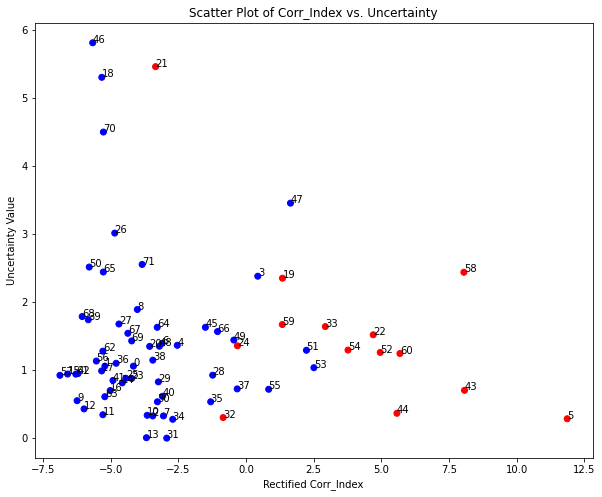

In [25]:
import matplotlib.pyplot as plt

# Assuming you have the corrIndex_df and filtered_df DataFrames
# You can replace 'corrIndex_df' and 'filtered_df' with the actual names of your DataFrames

# Create a larger figure
plt.figure(figsize=(10, 8))

# Scatter plot with red color for samples where filtered_df["ICU"] is 1
plt.scatter(corrIndex_df["rectified_corr_index"], corrIndex_df["uncertainty_value"],
            c=["red" if icu == 1 else "blue" for icu in filtered_df["ICU"]],
            label="ICU = 1")

# Add labels and title to the plot
plt.xlabel("Rectified Corr_Index")
plt.ylabel("Uncertainty Value")
plt.title("Scatter Plot of Corr_Index vs. Uncertainty")

# Annotate each point with its index
for i, idx in enumerate(corrIndex_df.index):
    plt.annotate(idx, (corrIndex_df.loc[idx, "rectified_corr_index"], corrIndex_df.loc[idx, "uncertainty_value"]))


# Show the plot
plt.show()


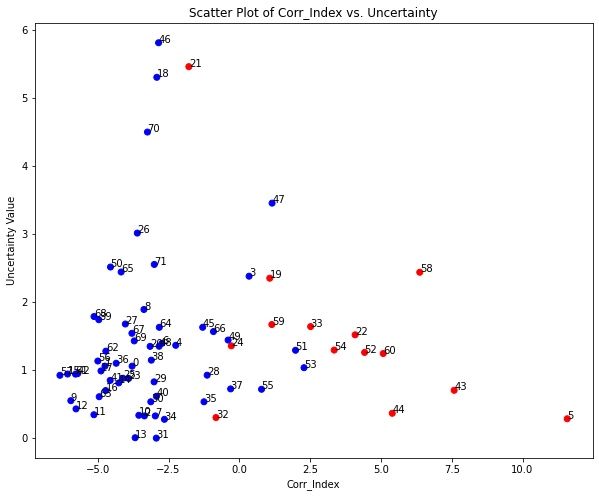

In [26]:
import matplotlib.pyplot as plt

# Assuming you have the corrIndex_df and filtered_df DataFrames
# You can replace 'corrIndex_df' and 'filtered_df' with the actual names of your DataFrames

# Create a larger figure
plt.figure(figsize=(10, 8))

# Scatter plot with red color for samples where filtered_df["ICU"] is 1
plt.scatter(corrIndex_df["corr_index"], corrIndex_df["uncertainty_value"],
            c=["red" if icu == 1 else "blue" for icu in filtered_df["ICU"]],
            label="ICU = 1")

# Add labels and title to the plot
plt.xlabel("Corr_Index")
plt.ylabel("Uncertainty Value")
plt.title("Scatter Plot of Corr_Index vs. Uncertainty")

# Annotate each point with its index
for i, idx in enumerate(corrIndex_df.index):
    plt.annotate(idx, (corrIndex_df.loc[idx, "corr_index"], corrIndex_df.loc[idx, "uncertainty_value"]))


# Show the plot
plt.show()
